In [1]:
import os
import importlib
import matplotlib.pyplot as plt

os.chdir('/home/jwdase/projects/language-detection/src')

In [2]:
from language_detection.data.csv_tools.read import num_speakers
lang_len = num_speakers(['en', 'it', 'de', 'es', 'ta', 'ja', 'nl'])

for lang, speakers in lang_len.items():
    print(f'{lang}: {speakers}')

Loaded: en from /om2/user/moshepol/prosody/data/raw_audio/en/custom/length.csv
Loaded: it from /om2/user/moshepol/prosody/data/raw_audio/it/custom/length.csv
Loaded: de from /om2/user/moshepol/prosody/data/raw_audio/de/custom/length.csv
Loaded: es from /om2/user/moshepol/prosody/data/raw_audio/es/custom/length.csv
Loaded: ta from /om2/user/moshepol/prosody/data/raw_audio/ta/custom/length.csv
Loaded: ja from /om2/user/moshepol/prosody/data/raw_audio/ja/custom/length.csv
Loaded: nl from /om2/user/moshepol/prosody/data/raw_audio/nl/custom/length.csv
en: 77437
it: 6946
de: 17667
es: 16927
ta: 513
ja: 1461
nl: 1589


<BarContainer object of 7 artists>

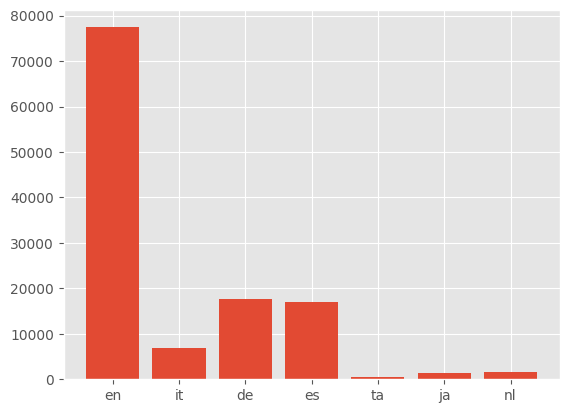

In [3]:
plt.style.use('ggplot')
plt.bar(list(lang_len.keys()), list(lang_len.values()))

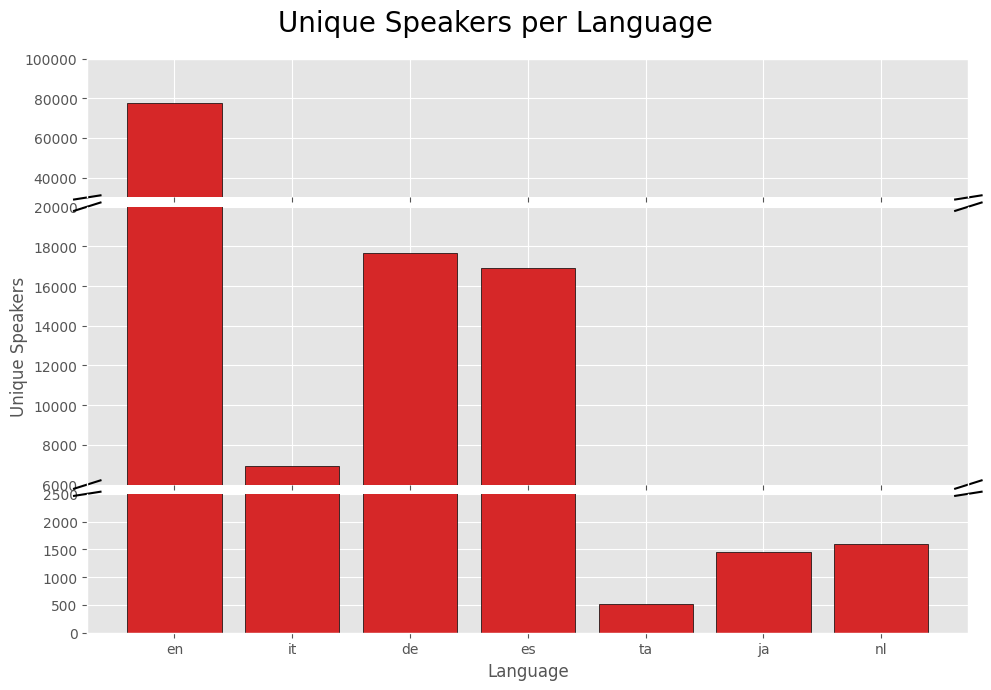

In [5]:
import matplotlib.pyplot as plt

labels = list(lang_len.keys())
values = list(lang_len.values())

# Create 3 subplots: high, mid, low
fig, (ax1, ax2, ax3) = plt.subplots(
    3, 1, sharex=True, figsize=(10, 7),
    gridspec_kw={'height_ratios': [1, 2, 1]}
)

# Plot the same bars on all 3
ax1.bar(labels, values, color='#d62728', edgecolor='black')
ax2.bar(labels, values, color='#d62728', edgecolor='black')
ax3.bar(labels, values, color='#d62728', edgecolor='black')

# Set y-limits for each subplot
ax1.set_ylim(30_000, 100_000)  # High region
ax2.set_ylim(6000, 20_000)    # Middle region
ax3.set_ylim(0, 2500)       # Low region

# Hide spines between plots
for ax in [ax1, ax2]:
    ax.spines['bottom'].set_visible(False)
for ax in [ax2, ax3]:
    ax.spines['top'].set_visible(False)

# Turn off repeated x-tick labels
ax1.tick_params(labelbottom=False)
ax2.tick_params(labelbottom=False)

# Add slanted break lines
d = .015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
ax2.plot((-d, +d), (-d, +d), **kwargs)
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax3.transAxes)
ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax3.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Labels and title
fig.suptitle("Unique Speakers per Language", fontsize=20)
ax3.set_xlabel("Language", fontsize=12)
ax2.set_ylabel("Unique Speakers", fontsize=12)

plt.tight_layout()
plt.subplots_adjust(hspace=0.05)

plt.savefig('plots/figures/unique_speakers.pdf')